# A quick assessment of the timing performance of expyriment 


The script [check-audio-visual-timing](https://github.com/chrplr/PCBS/blob/master/experiments/expyriment/check-audio-visual-timing.py) attempts to display a white square for 100ms and simultaneously play a 100ms pure tone, every half second, like in the [Timing Mega-study](https://peerj.com/articles/9414/).

I launched this script on a venerable computer, a Latitude E6320 with a Core i5-2540M, running Ubuntu 20.04.4 and Expyriment 0.10, monitoring the  visual and audio events with a BlackBox ToolKit v2 controlled by the [bbtkv2 python module](https://github.com/chrplr/bbtkv2_python).

265 trials were recorded. Here is a quick analysis (I shall do better another time: with more measurements and better settings, see below) 

In [66]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [67]:
events = pd.read_csv('bbtk_processed_events.csv')
events.loc[events.Type == 'Opto1'].count()

Unnamed: 0    265
Type          265
Onset         265
Duration      265
dtype: int64

# duration of visual square (target=100ms)

In [68]:
events.loc[events.Type == 'Opto1'].Duration.describe()

count    265.000000
mean     100.934906
std        6.793892
min       83.000000
25%      101.000000
50%      102.250000
75%      103.750000
max      127.750000
Name: Duration, dtype: float64

(array([ 6., 12.,  9.,  5.,  2.,  2.,  1.,  1.,  0.,  0.,  0., 27., 83.,
        55., 31.,  8.,  8.,  2.,  8.,  0.,  0.,  0.,  0.,  3.,  0.,  1.,
         0.,  0.,  0.,  1.]),
 array([ 83.        ,  84.49166667,  85.98333333,  87.475     ,
         88.96666667,  90.45833333,  91.95      ,  93.44166667,
         94.93333333,  96.425     ,  97.91666667,  99.40833333,
        100.9       , 102.39166667, 103.88333333, 105.375     ,
        106.86666667, 108.35833333, 109.85      , 111.34166667,
        112.83333333, 114.325     , 115.81666667, 117.30833333,
        118.8       , 120.29166667, 121.78333333, 123.275     ,
        124.76666667, 126.25833333, 127.75      ]),
 <BarContainer object of 30 artists>)

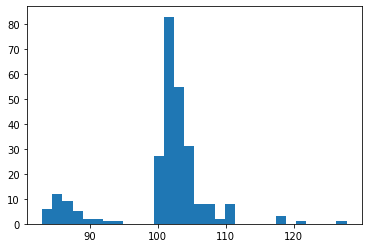

In [69]:
plt.hist(events.loc[events.Type=='Opto1'].Duration, bins=30)

## Visual ISI (target=500ms)

In [70]:
events.loc[events.Type == 'Opto1'].Onset.diff().describe()

count    264.000000
mean     499.962121
std        7.619984
min      486.500000
25%      503.250000
50%      503.500000
75%      503.500000
max      520.750000
Name: Onset, dtype: float64

Remark: as we were actually aiming at displaying at the the target times, the ISI is not the best measure because it will be shorten to compensate for trial in which the square as displayed for a too long or not long enough

# Differences between Audio and Visual onset times

In [71]:
soa = events.loc[events.Type == 'Mic1'].Onset.to_numpy() - events.loc[events.Type == 'Opto1'].Onset.to_numpy()
pd.Series(soa).describe()

count    265.000000
mean      -3.170755
std        5.874584
min      -24.500000
25%       -7.500000
50%       -3.000000
75%        1.500000
max        8.500000
dtype: float64

(array([ 2.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  2.,  2.,  3.,  5., 16.,
        11., 15., 14., 14., 21., 13., 17., 16., 12., 25., 18., 18., 13.,
        10.,  8.,  6.,  2.]),
 array([-24.5, -23.4, -22.3, -21.2, -20.1, -19. , -17.9, -16.8, -15.7,
        -14.6, -13.5, -12.4, -11.3, -10.2,  -9.1,  -8. ,  -6.9,  -5.8,
         -4.7,  -3.6,  -2.5,  -1.4,  -0.3,   0.8,   1.9,   3. ,   4.1,
          5.2,   6.3,   7.4,   8.5]),
 <BarContainer object of 30 artists>)

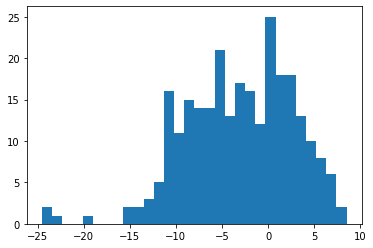

In [72]:
plt.hist(soa, bins=30)

It is odd to see negative number. I suspect that the photodiode did not always detect the onset of the flashed square. Let's check this. 

Text(0, 0.5, 'Visual-Audio SOA target=0ms)')

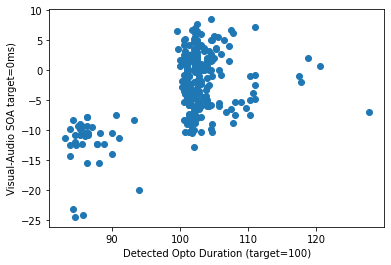

In [73]:
plt.plot(events.loc[events.Type == 'Opto1'].Duration, soa, marker='o', linestyle='')
plt.xlabel('Detected Opto Duration (target=100)')
plt.ylabel('Visual-Audio SOA target=0ms)')

CCL: I should rerun the experiment checking more carefully the Opto detection threshold !

# Audio duration (target=100ms)

In [74]:
events.loc[events.Type == 'Mic1'].Duration.describe()

count    265.000000
mean     119.805660
std        0.104202
min      119.750000
25%      119.750000
50%      119.750000
75%      119.750000
max      120.000000
Name: Duration, dtype: float64

Note: the documentation of the Black Box toolkits mentions that when smoothing is 'on' (as was the case here), one must subtract 20ms. Thus we find that the duration is correct.

---
Christophe@pallier.org

2022-04-22